The attached spreadsheet contains some made up numbers about a fictitious SaaS company which runs various product offerings.  

Here's a quick guide to the terms you'll encounter in the file:

- The “self-serve” customers require little touch from a salesperson. They essentially visit the company's website and want to get started right away by using one of the self-serve plans (bronze, silver, gold)

- The “enterprise” customers are typically on a "platinum" plan 

- Deals are generated from inbound leads via the web. Here is the sequence of events: 

    1. A prospective customers visits the website and either signs up for a self-serve account or works with a sales rep to figure out the right enterprise plan for them.

    1. A lead turns into a created opportunity once a Sales Rep has had a chance to qualify them. For purposes of this exercise, assume all opportunities are “enterprise-level” customers pursuing platinum plans.

    1. A created opportunity is “closed” once they have been converted into a paying customer.

This exercise is fairly open-ended, but here a few questions to address when working through the data:
- What are some trends you find interesting or concerning?
- What additional information do you think you'd need to better understand what's going on?
- Which departments or teams would you team up with to investigate further?
- Are there are any glaring opportunities / low hanging fruit that should be addressed right away?
- Any other thoughts or questions?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.dates as mdates

%matplotlib inline

/Users/michaelpiccirilli/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_excel("exercise.xlsx", sheet_name="Sheet1")
df.head()

,Group,Type,2016_01_01,2016_02_01,2016_03_01,2016_04_01,2016_05_01,2016_06_01,2016_07_01,2016_08_01,2016_09_01
0,Revenue,New_Recurring_Revenue,49500.0,49500.0,60500.0,71500.0,74250.0,99000.0,115500.0,104500.0,82500.0
1,New Customer,Bronze_Plan,20.0,21.0,23.0,26.0,30.0,29.0,30.0,29.0,31.0
2,New Customer,Silver_Plan,9.0,12.0,14.0,13.0,15.0,14.0,13.0,18.0,15.0
3,New Customer,Gold_Plan,5.0,8.0,8.0,8.0,11.0,9.0,10.0,11.0,9.0
4,New Customer,Total_New_Customers,34.0,41.0,45.0,47.0,56.0,52.0,53.0,58.0,55.0


In [3]:
# It'll be easier to look at this data if it's transposed.  
# Get the date columns and transpose the dataset
date_cols = df.columns[df.columns.str.contains("2016")].tolist()
tdf = df[["Type"] + date_cols].set_index("Type").T
tdf

Type,New_Recurring_Revenue,Bronze_Plan,Silver_Plan,Gold_Plan,Total_New_Customers,Enterprise_Clients,Ramped_AE,Total_AE,Sales_Reps,Web_Leads_Created,Opportunities_Opened,Opportunities_Closed,Advertising,Other_Marketing_Spend
2016_01_01,49500.0,20.0,9.0,5.0,34.0,3.0,4.0,4.0,6.0,500.0,70.0,3.0,9862.1913,6621.9426
2016_02_01,49500.0,21.0,12.0,8.0,41.0,3.0,4.0,6.0,7.0,700.0,70.0,3.0,13215.9625,4694.4547
2016_03_01,60500.0,23.0,14.0,8.0,45.0,4.0,5.0,6.0,8.0,700.0,80.0,4.0,17439.0918,11890.8673
2016_04_01,71500.0,26.0,13.0,8.0,47.0,4.0,5.0,8.0,10.0,900.0,90.0,4.0,25920.9925,19851.8983
2016_05_01,74250.0,30.0,15.0,11.0,56.0,4.0,7.0,9.0,9.0,1100.0,90.0,4.0,29402.2859,14795.5496
2016_06_01,99000.0,29.0,14.0,9.0,52.0,4.0,8.0,9.0,10.0,1330.0,95.0,4.0,26510.8038,18911.2209
2016_07_01,115500.0,30.0,13.0,10.0,53.0,4.0,9.0,12.0,13.0,1380.0,100.0,4.0,28778.2365,12706.5796
2016_08_01,104500.0,29.0,18.0,11.0,58.0,3.0,11.0,18.0,8.0,1200.0,100.0,3.0,25791.5528,25026.0569
2016_09_01,82500.0,31.0,15.0,9.0,55.0,4.0,13.0,20.0,10.0,1000.0,120.0,5.0,22831.2409,20208.2478


# Exploratory Data Analysis

I'm going to be exploring relationships between advertising, leads {created, opened, closed}, headcount, self-service clients. 


Let's first see if there is any correlation between these line items.  I understand some of the correlations will not be meaninful, however it'll be easier to just run this on the entire table. 


### Correlation of data points

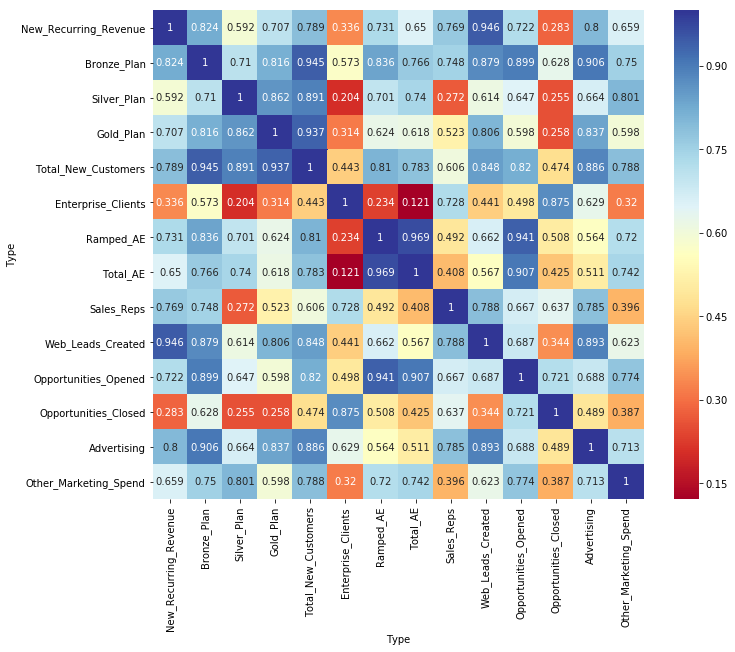

In [5]:
plt.figure(1, figsize=(11,9))
sns.heatmap(round(tdf.corr(),3), annot=True, fmt="g", cmap="RdYlBu")

- Advertising
    - Strong relationship between Advertising and number of Bronze and Gold plans, as well as Created web leads
    - Relationship between the Adertising and number of Silver Plans and Enterprise not as strong as compared to Bronze and Gold plans. 
    
- Other Marketing Spend
    - Relationship between Other Marketing Spend and number of Gold Plan much lower than between Bronze and Silver, and even weaker for between the number of Enterprise Clients
    
- Revenue
    - Strong relationship to Advertising, moderate relationship to Other Marketing Spend, and AEs / Sales Reps. 
    - Strong relationship to number of Bronze clients, moderate relationship to Gold Plans, fair relationship to Silver Plans
    - Weak relationship between number of enterprise clients and opportunties closed

- Sales Reps / AEs
    - Moderately strong relationship between the # Sales reps and Enterprise clients
    - Moderately strong relationship between Sales reps / AEs and revenue
    
    
    
    
    
    

In [6]:
# Let's create a few more metrics in the dataset

tdf['PctClosed'] = round((tdf.Opportunities_Closed / tdf.Opportunities_Opened),2)
tdf['PctOpened'] = round((tdf.Opportunities_Opened  / tdf.Web_Leads_Created),2)
tdf['OpenedOppPerLead'] = round((tdf.Opportunities_Opened / tdf.Web_Leads_Created),2)
tdf['OpenedOppPerRep'] = round((tdf.Opportunities_Opened / tdf.Sales_Reps),2)
tdf['ClosedOppPerRep'] = round((tdf.Opportunities_Closed / tdf.Sales_Reps),2)
tdf['ClosedOppPerLead'] = round((tdf.Opportunities_Closed / tdf.Web_Leads_Created),4)
tdf['ClosedOppPerOpen'] = round((tdf.Opportunities_Closed / tdf.Opportunities_Opened),4)
tdf['LeadsPerAdvertising'] = (tdf.Advertising / tdf.Web_Leads_Created)
tdf['TotalMarketingSpend'] = tdf.Advertising + tdf.Other_Marketing_Spend
tdf['MoMRevDiffPct'] = ((tdf.New_Recurring_Revenue - tdf.New_Recurring_Revenue.shift(1))/tdf.New_Recurring_Revenue)
tdf['MoMRevDiff']  = ((tdf.New_Recurring_Revenue - tdf.New_Recurring_Revenue.shift(1)))
tdf['GoldPerTotal'] = tdf.Gold_Plan/tdf.Total_New_Customers
tdf['SilverPerTotal'] = tdf.Silver_Plan/tdf.Total_New_Customers
tdf['BronzePerTotal'] = tdf.Bronze_Plan/tdf.Total_New_Customers


dates = [] # used for plotting... 
for date in tdf.index: # .apply() function wasn't working for whatever reason, so a loop it is...
    dates.append(date.split("_")[0] + "-" + date.split("_")[1] + "-" + date.split("_")[2])
tdf['dates'] = dates
#tdf['dates'] = pd.to_datetime(tdf['dates'], format="%Y-%m-%d")

tdf

Type,New_Recurring_Revenue,Bronze_Plan,Silver_Plan,Gold_Plan,Total_New_Customers,Enterprise_Clients,Ramped_AE,Total_AE,Sales_Reps,Web_Leads_Created,...,ClosedOppPerLead,ClosedOppPerOpen,LeadsPerAdvertising,TotalMarketingSpend,MoMRevDiffPct,MoMRevDiff,GoldPerTotal,SilverPerTotal,BronzePerTotal,dates
2016_01_01,49500.0,20.0,9.0,5.0,34.0,3.0,4.0,4.0,6.0,500.0,...,0.0060,0.0429,19.724383,16484.1339,NaN,NaN,0.147059,0.264706,0.588235,2016-01-01
2016_02_01,49500.0,21.0,12.0,8.0,41.0,3.0,4.0,6.0,7.0,700.0,...,0.0043,0.0429,18.879946,17910.4172,0.000000,0.0,0.195122,0.292683,0.512195,2016-02-01
2016_03_01,60500.0,23.0,14.0,8.0,45.0,4.0,5.0,6.0,8.0,700.0,...,0.0057,0.0500,24.912988,29329.9591,0.181818,11000.0,0.177778,0.311111,0.511111,2016-03-01
2016_04_01,71500.0,26.0,13.0,8.0,47.0,4.0,5.0,8.0,10.0,900.0,...,0.0044,0.0444,28.801103,45772.8908,0.153846,11000.0,0.170213,0.276596,0.553191,2016-04-01
2016_05_01,74250.0,30.0,15.0,11.0,56.0,4.0,7.0,9.0,9.0,1100.0,...,0.0036,0.0444,26.729351,44197.8355,0.037037,2750.0,0.196429,0.267857,0.535714,2016-05-01
2016_06_01,99000.0,29.0,14.0,9.0,52.0,4.0,8.0,9.0,10.0,1330.0,...,0.0030,0.0421,19.932935,45422.0247,0.250000,24750.0,0.173077,0.269231,0.557692,2016-06-01
2016_07_01,115500.0,30.0,13.0,10.0,53.0,4.0,9.0,12.0,13.0,1380.0,...,0.0029,0.0400,20.853795,41484.8161,0.142857,16500.0,0.188679,0.245283,0.566038,2016-07-01
2016_08_01,104500.0,29.0,18.0,11.0,58.0,3.0,11.0,18.0,8.0,1200.0,...,0.0025,0.0300,21.492961,50817.6097,-0.105263,-11000.0,0.189655,0.310345,0.500000,2016-08-01
2016_09_01,82500.0,31.0,15.0,9.0,55.0,4.0,13.0,20.0,10.0,1000.0,...,0.0050,0.0417,22.831241,43039.4887,-0.266667,-22000.0,0.163636,0.272727,0.563636,2016-09-01


### Monthly Revenue, Marketing Spend, and Account Growth

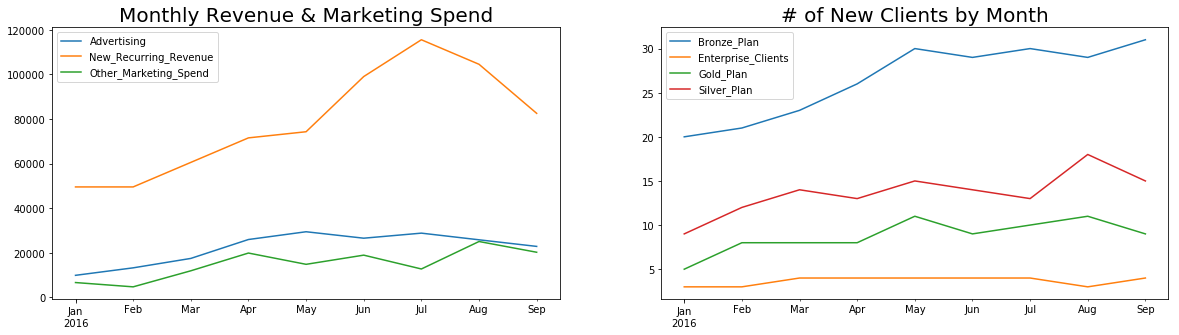

In [7]:
fig = plt.figure(figsize = (20,5))

# Plot Revenue & Marketing Spend
ax1 = fig.add_subplot(1,2,1)
plt.title("Monthly Revenue & Marketing Spend", fontsize = 20); plt.xlabel("")
revSpend = pd.melt(tdf[['New_Recurring_Revenue', 'dates', "Advertising", "Other_Marketing_Spend"]], 
        id_vars='dates', value_vars=['New_Recurring_Revenue',  "Advertising", "Other_Marketing_Spend"])
revSpend['dates'] = pd.to_datetime(revSpend['dates'], format="%Y-%m-%d")
for key, grp in revSpend.groupby('Type'):
    ax1 = grp.plot(ax=ax1, kind='line', x='dates', y='value', label=key); plt.xlabel("")


# Plot Number of Plans added by Type
tdfmelt = pd.melt(tdf[['dates', 'Bronze_Plan', "Silver_Plan", 'Gold_Plan', "Enterprise_Clients"]], 
                  id_vars='dates', value_vars=['Bronze_Plan', "Silver_Plan", 'Gold_Plan', "Enterprise_Clients"])
tdfmelt['dates'] = pd.to_datetime(tdfmelt['dates'], format="%Y-%m-%d")
ax2 = fig.add_subplot(1,2,2)
plt.title("# of New Clients by Month", fontsize = 20)
for key, grp in tdfmelt.groupby('Type'):
    ax2 = grp.plot(ax=ax2, kind='line', x='dates', y='value', label=key); plt.xlabel("")


### Efficiency of Sales Reps

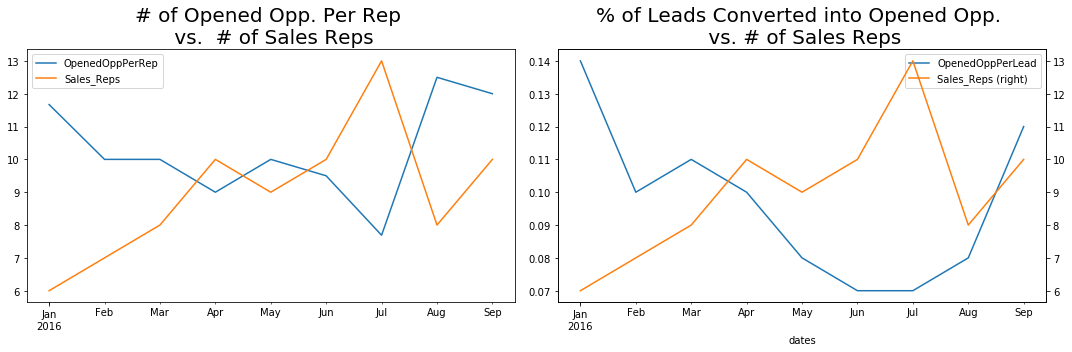

In [8]:
fig = plt.figure(figsize = (15,5))

# Plot Number of Sales Reps & Opened Opps per Rep
ax1 = fig.add_subplot(1,2,1)
plt.title("# of Opened Opp. Per Rep \n vs.  # of Sales Reps", fontsize = 20)
leadsPerRep = pd.melt(tdf[['OpenedOppPerRep', 'dates', "Sales_Reps"]], 
        id_vars='dates', value_vars=["Sales_Reps", 'OpenedOppPerRep'])   
leadsPerRep['dates'] = pd.to_datetime(leadsPerRep['dates'], format="%Y-%m-%d")
for key, grp in leadsPerRep.groupby('Type'):
    ax1 = grp.plot(ax=ax1, kind='line', x='dates', y='value', label=key); plt.xlabel("")

# Plot % of Leads that are turned into Opened Opportunities
ax2 = fig.add_subplot(1,2,2)
plt.title("% of Leads Converted into Opened Opp. \n vs. # of Sales Reps", fontsize = 20); plt.xlabel("")
tdf['dates'] = pd.to_datetime(tdf['dates'], format="%Y-%m-%d")
ax2 = tdf[['OpenedOppPerLead', 'dates']].plot(ax = ax2, kind = 'line', 
                                              x = 'dates', y = 'OpenedOppPerLead'); plt.xlabel("")
tdf[['Sales_Reps', 'dates']
        ].plot(kind = 'line', x = 'dates', y = 'Sales_Reps', ax = ax2, secondary_y = True); plt.xlabel("")


plt.tight_layout()

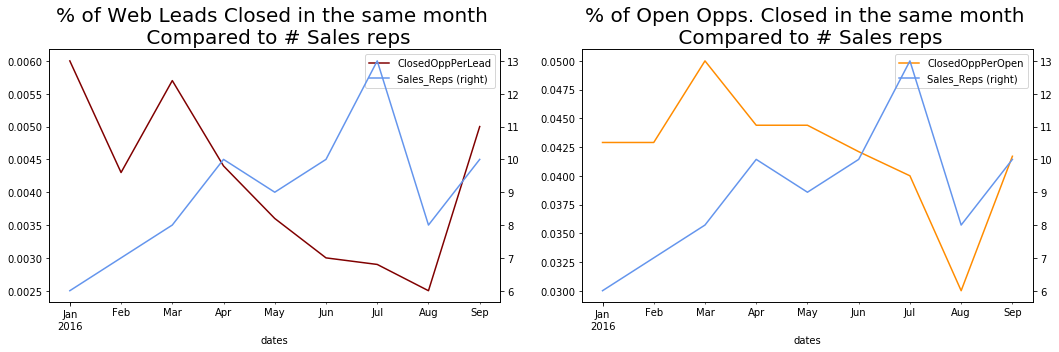

In [9]:

# Plot Pct of Leads become Closed
fig = plt.figure(figsize = (15,5))

srepCol = 'cornflowerblue'

ax = fig.add_subplot(1,2,1)
plt.title("% of Web Leads Closed in the same month \n Compared to # Sales reps", fontsize = 20)
tdf[['ClosedOppPerLead', 'dates']
        ].plot(kind = 'line', x = 'dates', y = 'ClosedOppPerLead', ax = ax, c = 'maroon')
tdf[['Sales_Reps', 'dates']
        ].plot(kind = 'line', x = 'dates', y = 'Sales_Reps', ax = ax, secondary_y = True, c = srepCol)

ax2 = plt.subplot(1,2,2)
plt.title("% of Open Opps. Closed in the same month \n Compared to # Sales reps", fontsize = 20)
tdf[['ClosedOppPerOpen', 'dates']
   ].plot(kind = 'line', x = 'dates', y = 'ClosedOppPerOpen',  ax = ax2, c = 'darkorange')
tdf[['Sales_Reps', 'dates']
        ].plot(kind = 'line', x = 'dates', y = 'Sales_Reps', ax = ax2, secondary_y = True, c=srepCol)


plt.tight_layout()

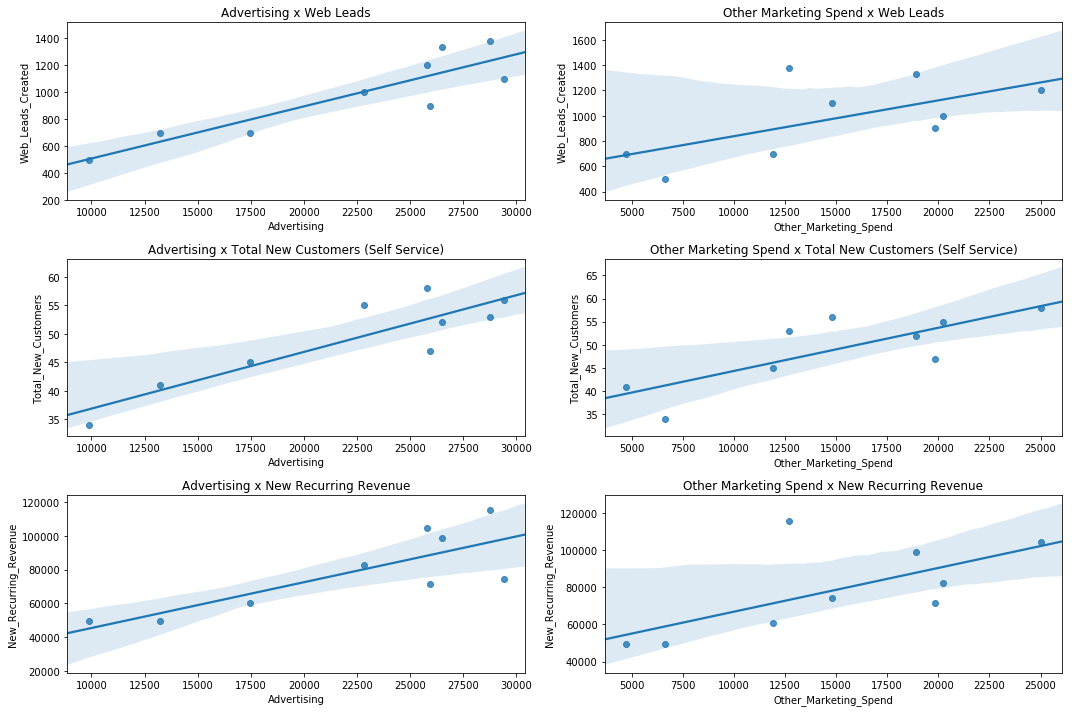

In [10]:
fig = plt.figure(figsize =(15,10))

# Advertising x Web Leads
ax1 = fig.add_subplot(3,2,1)
plt.title("Advertising x Web Leads")
sns.regplot(x = "Advertising", y = "Web_Leads_Created", data = tdf, ax = ax1)

# Marketing Spend x Web Leads
ax2 = fig.add_subplot(3,2,2)
plt.title("Other Marketing Spend x Web Leads")
sns.regplot(x = "Other_Marketing_Spend", y = "Web_Leads_Created", data = tdf, ax = ax2)

# Advertising x Total New Customers
ax3 = fig.add_subplot(3,2,3)
plt.title("Advertising x Total New Customers (Self Service)")
sns.regplot(x = "Advertising", y = "Total_New_Customers", data = tdf, ax = ax3)

# Other Marketing x Total New Customers (self service)
ax4 = fig.add_subplot(3,2,4)
plt.title("Other Marketing Spend x Total New Customers (Self Service)")
sns.regplot(x = "Other_Marketing_Spend", y = "Total_New_Customers", data = tdf, ax = ax4)

# Advertising x Total New Customers
ax5 = fig.add_subplot(3,2,5)
plt.title("Advertising x New Recurring Revenue")
sns.regplot(x = "Advertising", y = "New_Recurring_Revenue", data = tdf, ax = ax5)

# Other Marketing x Total New Customers (self service)
ax6 = fig.add_subplot(3,2,6)
plt.title("Other Marketing Spend x New Recurring Revenue")
sns.regplot(x = "Other_Marketing_Spend", y = "New_Recurring_Revenue", data = tdf, ax = ax6)


plt.tight_layout()

Individually, there exists a positive relationship between Web Leads, Total New Customers, and New Recurring Revenue to Advertising and Other Marketing Spend.

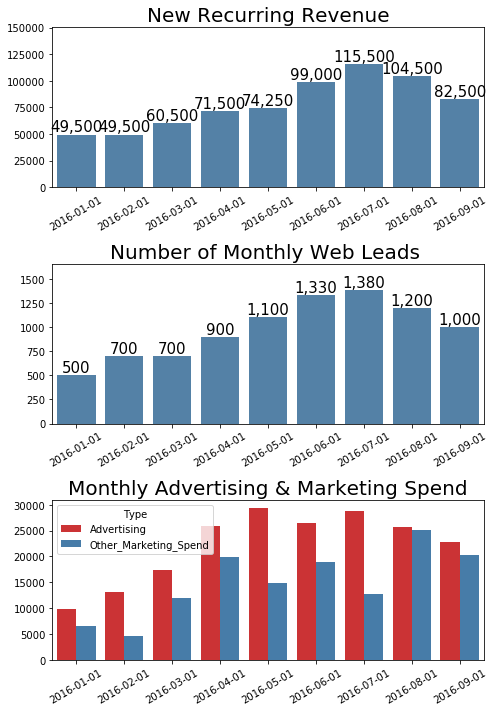

In [12]:
# Let's create some bar charts of monthly revenue, web leads, and marketing spend

tdf['year_qtr'] = np.repeat('2016 Q1', 3).tolist() + np.repeat('2016 Q2', 3).tolist() + np.repeat('2016 Q3',3).tolist()
tdf['dates'] = dates

aggDF = tdf[['New_Recurring_Revenue', 'Web_Leads_Created', 'Opportunities_Opened', "Opportunities_Closed",
             "Total_New_Customers", "Advertising", "TotalMarketingSpend",
             #'year_qtr']
             'dates']
           ].groupby('dates').sum().reset_index()

colrs = ['steelblue' for x in aggDF]

fig = plt.figure(figsize=(7,10))

# Monthly  Revenue
ax = fig.add_subplot(3,1,1)
g = sns.barplot(data = aggDF, x = 'dates', y = 'New_Recurring_Revenue', palette=colrs, ax = ax)
plt.ylabel(''); plt.xlabel(''); plt.ylim(0, max(aggDF.New_Recurring_Revenue)*1.3)
plt.xticks(rotation=30)
plt.title("New Recurring Revenue", fontsize = 20)
for index, row in aggDF.iterrows():
    g.text(row.name, row.New_Recurring_Revenue, "{:,}".format(round(row.New_Recurring_Revenue)), 
           color='black', fontsize = 15, ha="center", va="bottom")

# Add Total New Customers
# ax = fig.add_subplot(3,1,2)
# g = sns.barplot(data = aggDF, x = 'dates', y = 'Opportunities_Closed', palette=colrs, ax = ax)
# plt.ylabel(''); plt.xlabel(''); plt.ylim(0, max(aggDF.Opportunities_Closed)*1.2)
# plt.xticks(rotation=30)
# for index, row in aggDF.iterrows():
#     g.text(row.name, row.Opportunities_Closed, "{:,}".format(round(row.Opportunities_Closed)), 
#            color='black', fontsize = 15, ha="center", va="bottom")

# Add # of Web Leads
ax = fig.add_subplot(3,1,2)
g = sns.barplot(data = aggDF, x = 'dates', y = 'Web_Leads_Created', palette=colrs, ax = ax)
plt.ylabel(''); plt.xlabel(''); plt.ylim(0, max(aggDF.Web_Leads_Created)*1.2)
plt.xticks(rotation=30)
plt.title("Number of Monthly Web Leads ", fontsize = 20)
for index, row in aggDF.iterrows():
    g.text(row.name, row.Web_Leads_Created, "{:,}".format(round(row.Web_Leads_Created)), 
           color='black', fontsize = 15, ha="center", va="bottom")

# Total Marketing Spend: TotalMarketingSpend
# ax = fig.add_subplot(2,2,4)
# g = sns.barplot(data = aggDF, x = 'dates', y = 'TotalMarketingSpend', palette=colrs, ax = ax)
# plt.ylabel(''); plt.xlabel(''); plt.ylim(0, max(aggDF.TotalMarketingSpend)*1.2)
# plt.xticks(rotation=30)
# plt.title("Total Spent in Advertising & Marketing", fontsize = 20)
# for index, row in aggDF.iterrows():
#     g.text(row.name, row.TotalMarketingSpend, "{:,}".format(round(row.TotalMarketingSpend)), 
#            color='black', fontsize = 15, ha="center", va="bottom")

ax = fig.add_subplot(3,1,3)
tmpdf = pd.melt(tdf[['dates', "Advertising", "Other_Marketing_Spend"]], id_vars = 'dates', 
       value_vars = ["Advertising", "Other_Marketing_Spend"])
plt.figure(1, figsize =(10,5))
sns.barplot(ax = ax, data = tmpdf, x = 'dates', y = 'value', hue='Type', 
            palette= "Set1"); plt.xlabel(""); plt.ylabel('')
plt.xticks(rotation=30)
plt.title("Monthly Advertising & Marketing Spend", fontsize =20)    


plt.tight_layout()

### Summary Stats..

In [16]:
print("Average month over month growth: ", str(round((np.average(tdf['MoMRevDiffPct'].dropna()))*100,2))+"%")

Average month over month growth:  4.92%


In [17]:
print('Total New Gold Plan customers: ', tdf.Gold_Plan.sum())
print("Total New Silver Plan customer: ", tdf.Silver_Plan.sum())
print("Total New Bronze Plan Customers: ", tdf.Bronze_Plan.sum())
print("Total New Enterprise Customers: ", tdf.Enterprise_Clients.sum())
print("Total New Customers: ", tdf.Total_New_Customers.sum())

Total New Gold Plan customers:  79.0
Total New Silver Plan customer:  123.0
Total New Bronze Plan Customers:  239.0
Total New Enterprise Customers:  33.0
Total New Customers:  441.0


In [18]:
# Plan subscriptions by quarter...
custAggDF = tdf[["Gold_Plan", "Silver_Plan", 'Bronze_Plan',"Total_New_Customers",'year_qtr']
               ].groupby('year_qtr').sum().reset_index()

custAggDF

Type,year_qtr,Gold_Plan,Silver_Plan,Bronze_Plan,Total_New_Customers
0,2016 Q1,21.0,35.0,64.0,120.0
1,2016 Q2,28.0,42.0,85.0,155.0
2,2016 Q3,30.0,46.0,90.0,166.0


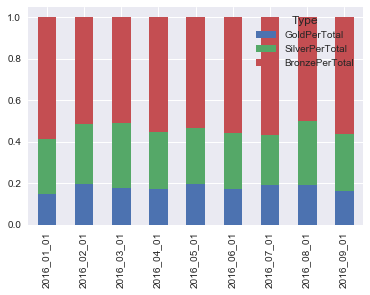

In [20]:
# Let's see if there are any trends in the percentage split in the monthly subscriptions..
sns.set()
tdf[['GoldPerTotal', 'SilverPerTotal', 'BronzePerTotal']].plot(kind = 'bar', stacked = True)

In [21]:
print("Average of monthly new revenue per marketing: ",  
      np.average(tdf.New_Recurring_Revenue / tdf.TotalMarketingSpend))

Overall average new revenue per marketing:  2.223146075028927


In [22]:
print("Overall average of monthly new revenue per marketing: ", 
      tdf.New_Recurring_Revenue.sum() / tdf.TotalMarketingSpend.sum())

Overall average of monthly new revenue per marketing:  2.1131129039017122


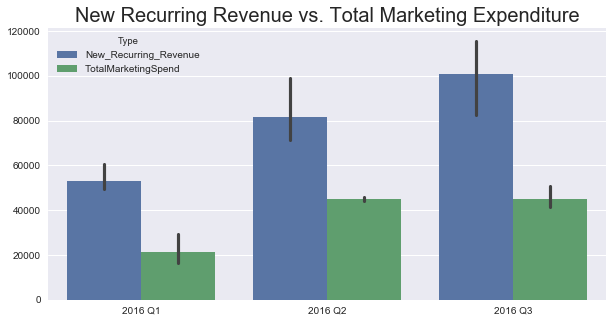

In [23]:
# Lets get quarter revenue and compare against total marketing
tmpdf = pd.melt(tdf[['year_qtr', 'New_Recurring_Revenue', 'TotalMarketingSpend']], id_vars = 'year_qtr', 
       value_vars = ['New_Recurring_Revenue', 'TotalMarketingSpend'])
plt.figure(1, figsize =(10,5))
sns.barplot(data = tmpdf, x = 'year_qtr', y = 'value', hue='Type'); plt.xlabel(""); plt.ylabel('')
plt.title("New Recurring Revenue vs. Total Marketing Expenditure", fontsize =20)

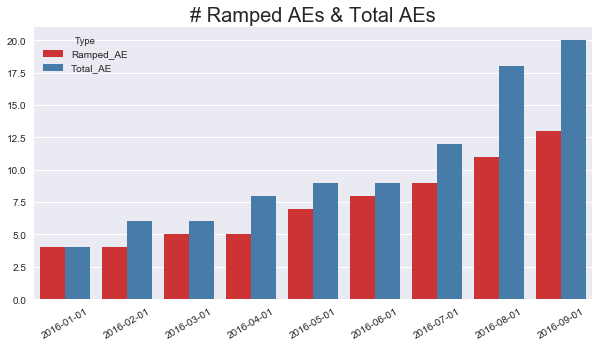

In [24]:
# Growth of AEs
tmpdf = pd.melt(tdf[['dates', "Ramped_AE", "Total_AE"]], id_vars = 'dates', 
       value_vars = ["Ramped_AE", "Total_AE"])
plt.figure(1, figsize =(10,5))
sns.barplot(data = tmpdf, x = 'dates', y = 'value', hue='Type', palette= "Set1"); plt.xlabel(""); plt.ylabel('')
plt.xticks(rotation=30)
plt.title("# Ramped AEs & Total AEs", fontsize =20)

## Regression of Revenue & Web Leads on Adverts/Marketing

#### Revenue ~ Adverising + Other Marketing Spend

In [25]:
revAttribution = smf.ols("""New_Recurring_Revenue ~ Advertising + Other_Marketing_Spend""", 
                         data=tdf).fit()
print(revAttribution.summary())

                              OLS Regression Results                             
Dep. Variable:     New_Recurring_Revenue   R-squared:                       0.656
Model:                               OLS   Adj. R-squared:                  0.542
Method:                    Least Squares   F-statistic:                     5.726
Date:                   Wed, 02 May 2018   Prob (F-statistic):             0.0406
Time:                           20:36:25   Log-Likelihood:                -98.156
No. Observations:                      9   AIC:                             202.3
Df Residuals:                          6   BIC:                             202.9
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


/Users/michaelpiccirilli/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


When regressing the revenue against the advertising and other marketing spend, we find that: 

- A \$1,000 increase in Advertising results in a see a \$2,274 increase in revenue
- A \$1,000 increase in Other Marketing Spend results in a \$645 increase in revenue. 

#### Web Leads ~ Advertising + Other Marketing Spend

In [26]:
webLeadsAttr = smf.ols('Web_Leads_Created ~ Advertising + Other_Marketing_Spend ', data=tdf).fit()
print(webLeadsAttr.summary())

                            OLS Regression Results                            
Dep. Variable:      Web_Leads_Created   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     11.77
Date:                Wed, 02 May 2018   Prob (F-statistic):            0.00837
Time:                        20:36:28   Log-Likelihood:                -56.519
No. Observations:                   9   AIC:                             119.0
Df Residuals:                       6   BIC:                             119.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               123.43

/Users/michaelpiccirilli/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


When regressing the number of web leads against the advertising and other marketing spend, we find that: 

- A \$1,000 increase in Advertising results in a see a 39 additional web leads
- A \$1,000 increase in Other Marketing Spend results in 1.2 LESS web leads 

- **What are some trends you find interesting or concerning?**
    - We can see that month-over-month (MoM) revenue climbed between January and July, then began to drop despite the total number of clients continuing to grow. 
    - In general, the conversion percentage of leads into {open, closed} opportunities have not increased as the number of sales reps have increased.  I would at least expect the percentage of open opportunities to increase with the number of sales reps, however the percentage of leads that become open opportunities have largely declined. 


- **What additional information do you think you'd need to better understand what's going on?**
    1. How much does each type of client contributes to revenue?  Especially Enterprise Clients.
    1. How much time does it take to convert a `lead` into a `open opportunity` into a `closed opportunity`. This help us understand where there may be any bottle necks in the sales process. This will help me understand the 
    1. I'd be curious to know is what percentage of traffic to the site are converting into enterprise leads vs self-service customers, this will help with identifying ROI for advertising. Also, it would be beneficial to understand the type of advertising different customers have seen, and having which plan they've 
    1. How much additional follow-on business is being added each month by the account executives? It doesn't look like I can glean that from this dataset. I'd be curious to understand the large increases in revenue in June, July and August given the number of clients had plateaued. 
    1. Are there any commonalities that exist amongst the Enterprise Clients that have successfully closed?  We could potentially create a recommendation system to 'score' the incoming leads so as to assist the sales reps with closing more open opportunities? 
 

- **Which departments or teams would you team up with to investigate further?**
    1. Revenue per plan - I would hope that we have this recorded in a database somewhere at an customer / account level, so I'd start with the data engineering team. 
    1. Time to conversion - again, it would be great if we could have this recorded in a database somewhere. The data would pr 


- **Are there are any glaring opportunities / low hanging fruit that should be addressed right away?**
    - Perhaps we could focus on better training the sales reps on qualifying leads into open opportunties. The percentage of leads that have been converted into open opporuntities 


- **Any other thoughts or questions?**
    - What differentiates `Other Marketing Spend` from `Advertising`? 


